In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import signal
from scipy.signal import savgol_filter
from sklearn.metrics import mean_squared_error, r2_score
from IPython import display
import time
import IPython
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Text, Button
from IPython.display import display
import matplotlib.pyplot as plt

### Welcome to the Linear Regression Tool! Click "Run All" and Scroll to the Bottom to Start!

'w= 1.1511111111111112 b= 0.4522222222222223'

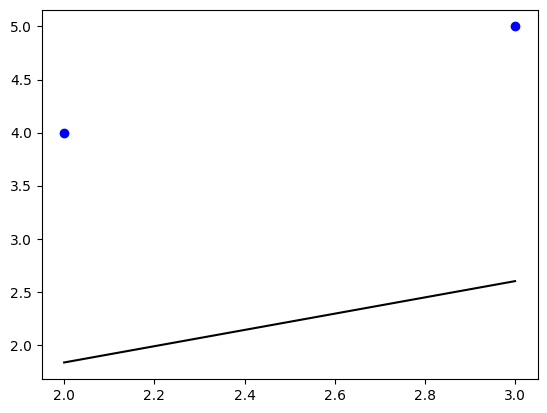

In [ ]:
#set up button and text box displays
x_inp_text_box = Text(value='', placeholder='x1,x2, .....', description='X')
y_inp_text_box = Text(value='', placeholder='y1,y2, .....', description='Y')
display = Button(description='Click to display x,y on plot')


input_box_x_y = HBox([x_inp_text_box, y_inp_text_box])
w_inp_text_box = Text(value='', placeholder='slope value', description='w')
b_inp_text_box = Text(value='', placeholder='y-intercept value', description='b')
plot = Button(description='Click to plot x,y,input linear function')


input_box_w_b = HBox([w_inp_text_box, b_inp_text_box])

alpha_inp_text_box = Text(value='', placeholder='learning rate', description='alpha')
num_iters_inp_text_box = Text(value='', placeholder='number of iterations', description='num. iterations')
run_lin_reg = Button(description='Click to run linear regression')
input_box_alpha_num_iters = HBox([alpha_inp_text_box, num_iters_inp_text_box])

output_box = VBox([input_box_x_y, display, input_box_w_b, plot, input_box_alpha_num_iters, run_lin_reg])

#error handling
def check_length(x_values, y_values):
        if len(x_values) != len(y_values):
            if (len(x_values) > len(y_values)):
                diff = len(x_values) - len(y_values)
                data_set = 'y'
            else:
                diff = len(y_values) - len(x_values)
                data_set = 'x'
            error_msg = widgets.HTML(value='Please add ' + str(diff) + ' more ' + data_set + ' value(s)')
            IPython.display.display(error_msg)
            time.sleep(3)
            error_msg.layout.visibility = 'hidden'
            return False
        else:
            return True
        
def is_float(string):
    if string.replace(".", "").isdigit():
        return True
    else:
        error_msg = widgets.HTML(value='Please enter valid floats or integers (iterations is integer only); do not put spaces between list commas')
        IPython.display.display(error_msg)
        time.sleep(3)
        error_msg.layout.visibility = 'hidden'
        return False
    
def is_integer(string):
    if string.isdigit():
        return True
    else:
        error_msg = widgets.HTML(value='Please enter valid floats or integers (iterations is integer only); do not put spaces between list commas')
        IPython.display.display(error_msg)
        time.sleep(3)
        error_msg.layout.visibility = 'hidden'
        return False

#button clicking and functions for buttons

def on_display_click(b):
    x_input = x_inp_text_box.value
    y_input = y_inp_text_box.value

    # parse the input data into a list of numbers
    x_values = x_input.split(',')
    y_values = y_input.split(',')

    #check that the data is usable
    if not check_length(x_values, y_values):
        return
    
    for item in x_values:
        if not is_float(item) and not is_integer(item):
            return
        
    for item in y_values:
        if not is_float(item) and not is_integer(item):
            return

    #reset the display
    IPython.display.clear_output(wait = False)
    IPython.display.display(output_box)

    #convert strings to numbers, consolidate the data, and display the plot
    data = [(float(x_values[i]), float(y_values[i]))
            for i in range(min(len(x_values), len(y_values)))]
      
    plt.clf()
    plt.scatter(*zip(*data))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

 
display.on_click(on_display_click)   

def on_plot_click(b):

    #check that the w and b are usable
    if not is_float(w_inp_text_box.value) and not is_integer(w_inp_text_box.value):
        return
    
    if not is_float(b_inp_text_box.value) and not is_integer(b_inp_text_box.value):
        return
    w_input = float(w_inp_text_box.value)
    b_input = float(b_inp_text_box.value)


    x_input = x_inp_text_box.value
    y_input = y_inp_text_box.value
    
    #parse the input data into a list of numbers
    x_values = x_input.split(',')
    y_values = y_input.split(',')
    
    #check that the data is usable
    for item in x_values:
        if not is_float(item) and not is_integer(item):
            return       
        
    for item in y_values:
        if not is_float(item) and not is_integer(item):
            return
      
    if not check_length(x_values, y_values):
        return
    
    #reset the display
    IPython.display.clear_output(wait = False)
    IPython.display.display(output_box)
    
    #convert strings to numbers
    x_values = [float(i) for i in x_values]
    y_values = [float(i) for i in y_values]

    data = [(float(x_values[i]), float(y_values[i]))
            for i in range(min(len(x_values), len(y_values)))]

    plt.clf()
    plt.scatter(*zip(*data))

    # plot a line with the provided equation and display
    x = x_values
    y = [((w_input * int(i))+b_input) for i in x_values]
    plt.plot(x, y, '-r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    

plot.on_click(on_plot_click)

def run_lin_regression(b):
   
    #check that alpha and iterations are usable
    if not is_float(alpha_inp_text_box.value) and not is_integer(alpha_inp_text_box.value):
        return
    
    if not is_integer(num_iters_inp_text_box.value):
        return

    alpha_input = float(alpha_inp_text_box.value)
    num_iters_input = int(num_iters_inp_text_box.value)

    x_input = x_inp_text_box.value
    y_input = y_inp_text_box.value

    #parse the input data into a list of numbers
    x_values = x_input.split(',')
    y_values = y_input.split(',')

    #check that the data is usable
    for item in x_values:
        if not is_float(item) and not is_integer(item):
            return

    for item in y_values:
        if not is_float(item) and not is_integer(item):
            return
        
    if not check_length(x_values, y_values):
        return
    
    #convert strings to numbers
    x_values = [float(i) for i in x_values]
    y_values = [float(i) for i in y_values]
    

    #run linear regression and show changes to w and b
    step_size = 0.05 * num_iters_input
    
    w = 0
    b = 0

    for i in range(num_iters_input):
        dJ_dw = 0
        dJ_db = 0
        for j in range(len(x_values)):
            dJ_dw = dJ_dw + (1/len(x_input)) * (w*x_values[j] + b - y_values[j])*x_values[j]
            dJ_db = dJ_db + (1/len(x_input))*(w*x_values[j] + b - y_values[j])
        
        w = w - alpha_input*dJ_dw
        b = b - alpha_input*dJ_db
        y_pred = np.empty([len(x_values), 1])
            
        for k in range(len(x_values)):
            y_pred[k] = w*x_values[k] + b

        if i % step_size == 0:
            plt.clf()
            plt.scatter(x_values, y_values, color='b')
            plt.plot(x_values, y_pred, color='k')
            IPython.display.display(plt.gcf())
            time.sleep(2)
            IPython.display.clear_output(wait = False)
    
    IPython.display.display(output_box) 
    IPython.display.display("w= " + str(w) + " b= " + str(b))       
            
run_lin_reg.on_click(run_lin_regression)
input_box_alpha_num_iters = HBox([alpha_inp_text_box, num_iters_inp_text_box])



output_box = VBox([input_box_x_y, display, input_box_w_b, plot, input_box_alpha_num_iters, run_lin_reg])
output_box